### [ Scatter(산점도) Plot 살펴보기]  
• 용도 : 2개이상의 컬럼들의 관계 정도를 시각화 하는 그래프  
• .corr

In [291]:
import pandas as pd
import numpy as np

.corr 설명 페이지  
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

In [292]:
# 예시1
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
df = pd.DataFrame([(.2, .3), (.0, .6), (.6, .0), (.2, .1)],
                  columns=['dogs', 'cats'])
df

,dogs,cats
0,0.2,0.3
1,0.0,0.6
2,0.6,0.0
3,0.2,0.1


In [293]:
# .corr : 
df.corr(method=histogram_intersection)

,dogs,cats
dogs,1.0,0.3
cats,0.3,1.0


In [294]:
# 예시2
df = pd.DataFrame([(1, 1), (2, np.nan), (np.nan, 3), (4, 4)],
                  columns=['dogs', 'cats'])
df

,dogs,cats
0,1.0,1.0
1,2.0,NaN
2,NaN,3.0
3,4.0,4.0


In [295]:
df.corr(min_periods=3)

,dogs,cats
dogs,1.0,NaN
cats,NaN,1.0


<hr>  2~3. 데이터 준비

In [296]:
# 2. 데이터 준비
file = '../DATA/auto-mpg.csv'
# 3. 읽어오기
mpgDF = pd.read_csv(file, sep='\s+', names =["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"])

o Additional Variable Information
1. mpg:           continuous
2. cylinders:     multi-valued discrete
3. displacement:  continuous
4. horsepower:    continuous
5. weight:        continuous
6. acceleration:  continuous
7. model year:    multi-valued discrete
8. origin:        multi-valued discrete
9. car name:      string (unique for each instance)

In [337]:
mpgDF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,medium,3504.0,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,medium,3693.0,11.5,70,US,buick skylark 320
2,18.0,8,318.0,medium,3436.0,11.0,70,US,plymouth satellite
3,16.0,8,304.0,medium,3433.0,12.0,70,US,amc rebel sst
4,17.0,8,302.0,medium,3449.0,10.5,70,US,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,low,2790.0,15.6,82,US,ford mustang gl
394,44.0,4,97.0,low,2130.0,24.6,82,EU,vw pickup
395,32.0,4,135.0,low,2295.0,11.6,82,US,dodge rampage
396,28.0,4,120.0,low,2625.0,18.6,82,US,ford ranger


In [297]:
mpgDF.head(3), mpgDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


(    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
 0  18.0          8         307.0      130.0  3504.0          12.0          70   
 1  15.0          8         350.0      165.0  3693.0          11.5          70   
 2  18.0          8         318.0      150.0  3436.0          11.0          70   
 
    origin                   car name  
 0       1  chevrolet chevelle malibu  
 1       1          buick skylark 320  
 2       1         plymouth satellite  ,
 None)

<hr>  4. 데이터 정보 확인

In [298]:
# 4. 데이터 정보 확인
# - horsepower : -> int
# 4-1. 고유값 확인 .unique .nunique
for col in mpgDF.columns:
    print('------------', col, '-----------------')
    print('.unique ->', mpgDF[col].unique)
    print('--------------------------------------')
    print('.nuique ->', mpgDF[col].nunique, '\n\n')

------------ mpg -----------------
.unique -> <bound method Series.unique of 0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64>
--------------------------------------
.nuique -> <bound method IndexOpsMixin.nunique of 0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64> 


------------ cylinders -----------------
.unique -> <bound method Series.unique of 0      8
1      8
2      8
3      8
4      8
      ..
393    4
394    4
395    4
396    4
397    4
Name: cylinders, Length: 398, dtype: int64>
--------------------------------------
.nuique -> <bound method IndexOpsMixin.nunique of 0      8
1      8
2      8
3      8
4      8
      ..
393    4
394    4
395    4
396    4
397    4
Name: cylinders, Length: 398, dtype: int64> 


------------ displacement 

In [299]:
# dropna= 
# :컬럼의 결측치 데이터 수까지 확인 가능
mpgDF['origin'].nunique(dropna=False), mpgDF['origin'].unique()

(3, array([1, 3, 2], dtype=int64))

<hr>  5. 데이터 전처리

In [300]:
# 5. 데이터 전처리
#   - 결측치 확인 => 꼭 NaN이 아닐 수 있다
#   - 중복값 확인
#   - 이상치 확인 => 정말 컬럼의 범위를 벗어난 값, 잘못 입력된 값
#   - 데이터 표준화 -> 자료형, 테이터 단위 일치
#   - 데이터 정규화 -> 데이터의 크기 일치

5-1. 결측치 확인

In [301]:
# 5-1. 결측치 체크 및 처리 -> 이상치를 NaN 변환 후 처리
valCount = mpgDF.horsepower.value_counts()
valCount, valCount.index

(horsepower
 150.0    22
 90.00    20
 88.00    19
 110.0    18
 100.0    17
          ..
 61.00     1
 93.00     1
 148.0     1
 152.0     1
 82.00     1
 Name: count, Length: 94, dtype: int64,
 Index(['150.0', '90.00', '88.00', '110.0', '100.0', '75.00', '95.00', '105.0',
        '70.00', '67.00', '65.00', '97.00', '85.00', '80.00', '145.0', '140.0',
        '92.00', '68.00', '78.00', '84.00', '?', '72.00', '180.0', '71.00',
        '86.00', '115.0', '130.0', '60.00', '170.0', '175.0', '83.00', '120.0',
        '76.00', '165.0', '52.00', '190.0', '125.0', '215.0', '48.00', '63.00',
        '112.0', '225.0', '96.00', '69.00', '74.00', '129.0', '98.00', '198.0',
        '53.00', '81.00', '79.00', '153.0', '58.00', '62.00', '87.00', '46.00',
        '160.0', '155.0', '139.0', '66.00', '149.0', '132.0', '64.00', '116.0',
        '77.00', '89.00', '142.0', '135.0', '138.0', '133.0', '103.0', '107.0',
        '108.0', '102.0', '220.0', '113.0', '200.0', '210.0', '193.0', '54.00',
        '

In [302]:
# count '?' 
mpgDF['horsepower'].value_counts()['?']

6

In [303]:
# .replace
mpgDF['horsepower'].replace('?', np.nan, inplace=True)

<hr>  5-2. 데이터 표준화

In [304]:
# 5-2. 데이터 표준화
# => horsepower 자료형을 실제 데이터와 일치시키기
# => float
mpgDF.horsepower = mpgDF.horsepower.astype('float32')
mpgDF.horsepower.describe()

count    392.000000
mean     104.469391
std       38.491138
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: horsepower, dtype: float64

In [305]:
# [ .cut ] : 데이터 범위화
# - bins= : 카테고리의 개수
# - labels= : 카테고리 이름
# - retbins=True : Whether to return the bins or not. 
#                  Useful when bins is provided as a scalar.
# - no inplace : 따로 저장해야함
# ----------------------------------------------------------
# .cut Example
pd.cut(
    np.array([1, 7, 5, 4, 6, 3]), bins = 3, 
    labels=['신생아', '영아', '유아'], retbins=True )

# 출력 : ['idx2', 'idx3', 'idx1', ... ], [label1 < label2 < label3]

(['신생아', '유아', '영아', '영아', '유아', '신생아']
 Categories (3, object): ['신생아' < '영아' < '유아'],
 array([0.994, 3.   , 5.   , 7.   ]))

In [306]:
# .cut ( .horsepower )
# - 46 ~ 230 -> 저출력 / 중출력 / 고출력
mpgDF_cut, ret = pd.cut( 
    mpgDF.horsepower, bins=3, labels=['low', 'medium', 'high'], retbins=True )
mpgDF.horsepower = mpgDF_cut  # ret = retbins; 사용하지 않음
mpgDF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,medium,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,medium,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,medium,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,medium,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,medium,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,low,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,low,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,low,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,low,2625.0,18.6,82,1,ford ranger


In [307]:
# 반장님 자료 : 어떤 건지 알겠다! 
# out, ret = pd.cut(mpgDF.horsepower, bins=3, labels=['저마력','중마력','고마력'], retbins=True) # 읽어들인 데이터를 가지고 분석
# # out, ret이 나온다(ret은 구간 정보)
# mpgDF.horsepower = out
# mpgDF.dtypes

<hr>  5-3. 데이터 정규화

In [308]:
# 5-3. 데이터 정규화
# => 범주형 => 연속형 / 수치화 변환 : One-Hot-Encoding 방식

In [309]:
# [ .get_dummies ] : one-hot Encoding
# - 컴퓨터가 인식하기 쉽게 0 1 로 만드는 작업
s = pd.Series(list('adcb'))
s, pd.get_dummies(s)        # 각 값을 컬럼화하여 0 1로 만듦

(0    a
 1    d
 2    c
 3    b
 dtype: object,
        a      b      c      d
 0   True  False  False  False
 1  False  False  False   True
 2  False  False   True  False
 3  False   True  False  False)

In [310]:
# 'origin' catergorize : USA, EU, JP
mpgDF['origin'].replace({1:'US', 2:'EU', 3:'JP'}, inplace=True)
mpgDF.origin.astype('category')
mpgDF.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower      category
weight           float64
acceleration     float64
model year         int64
origin            object
car name          object
dtype: object

<hr>
오후 수업

In [311]:
# 짧은 설명 - .concat( ) : DF 합치기 

<hr>  6. 데이터 시각화

In [312]:
# 6. 데이터 시각화
# 6-1. 연비 mpgDF 컬럼과 관계가 가장 높은 칼럼
corrDF = mpgDF.corr(numeric_only=True)
corrDF

,mpg,cylinders,displacement,weight,acceleration,model year
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000


In [313]:
corrDF['mpg']  # 

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
acceleration    0.420289
model year      0.579267
Name: mpg, dtype: float64

In [314]:
corrDF['mpg'][1:].sort_values()  # 

weight         -0.831741
displacement   -0.804203
cylinders      -0.775396
acceleration    0.420289
model year      0.579267
Name: mpg, dtype: float64

In [315]:
round(corrDF['mpg']['weight'], 2)

-0.83

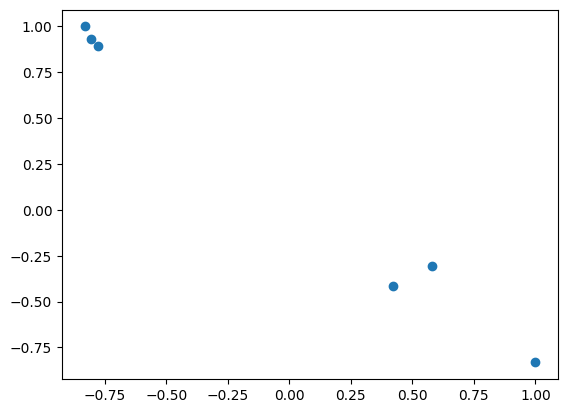

In [316]:
# -------- 시각화로 연비 mpg 컬럼의 관계 확인 --------
import matplotlib.pyplot as plt

plt.scatter(corrDF['mpg'], corrDF['weight'])

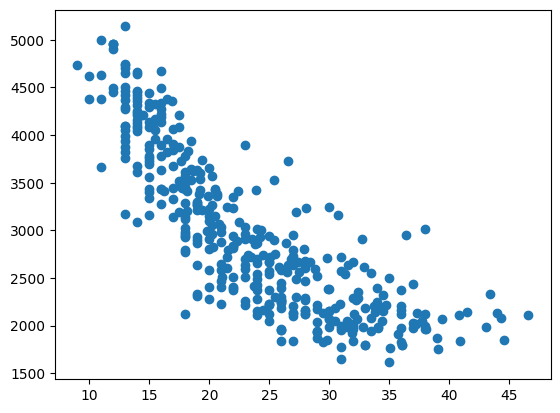

In [317]:
plt.scatter(mpgDF['mpg'], mpgDF['weight'])

In [318]:
# ----------------- 함수 선언 ---------------------
def scatterPlot(sr1, sr2):
    plt.scatter(sr1, sr2)
    plt.title((sr1.name,'-',sr2.name,f'[{round(corrDF[sr1.name][sr2.name], 2)}]'))
    plt.xlabel(sr1)
    plt.ylabel(sr2)
    plt.show()

# 수정 -> col로 접근
def printScatter(col1,col2):
    plt.scatter(mpgDF[col1], mpgDF[col2])
    plt.title((col1,'-', col2, f'[{round(corrDF[col1][col2],4)}]'))
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

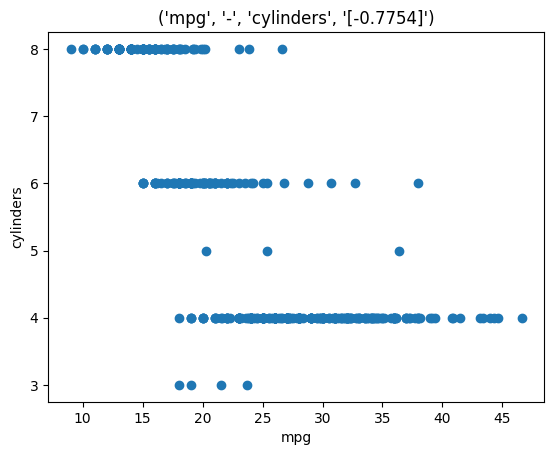

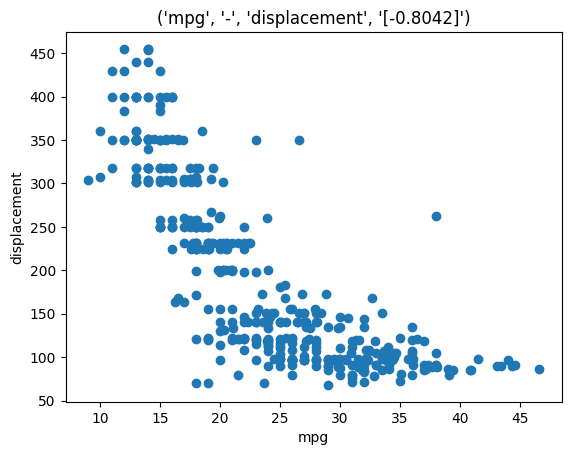

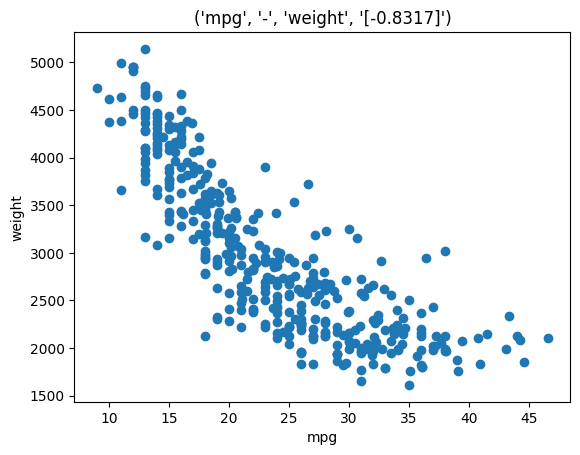

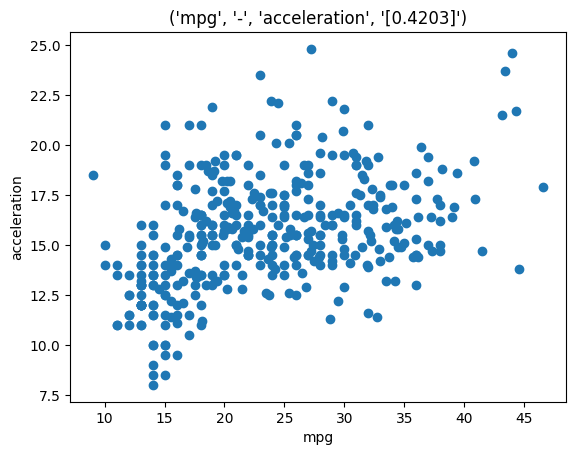

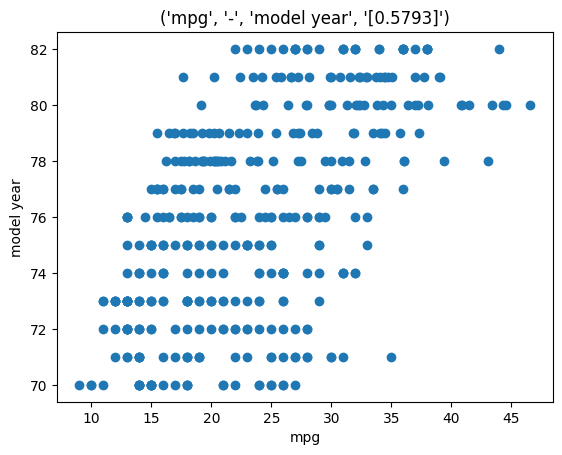

In [319]:
# mpg와 다른 변수 비교
for col in corrDF.columns[1:]:
    printScatter('mpg', col)

# - 그래프의 의미 
# - 상관계수가 -1, 1 이어도 관계성이 다를 수 있다; 그래프를 봐야한다

<hr>  6-2. 자동차 제조사의 데이터 비율 : 막대 그래프 활용

In [320]:
# Making Bar_Graph : .bar  .barh
originSR = mpgDF['origin'].value_counts()
originSR.index, originSR.values 

(Index(['US', 'JP', 'EU'], dtype='object', name='origin'),
 array([249,  79,  70], dtype=int64))

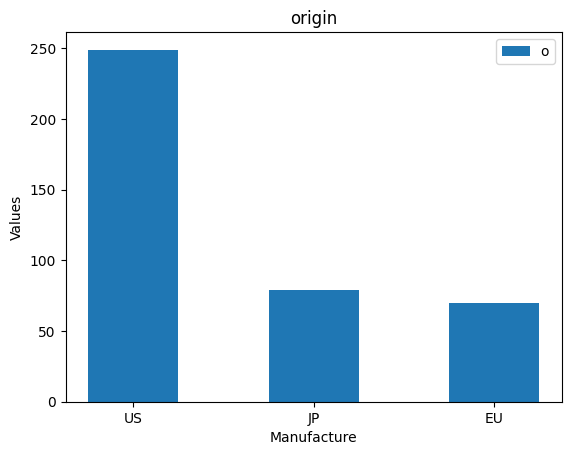

In [321]:
# .bar : vertical bar graph
plt.bar(originSR.index, originSR.values, width=0.5)  # width= : 바의 두께
plt.title('origin')
plt.xlabel('Manufacture') 
plt.ylabel('Values') 
plt.legend('origin') 
plt.show()

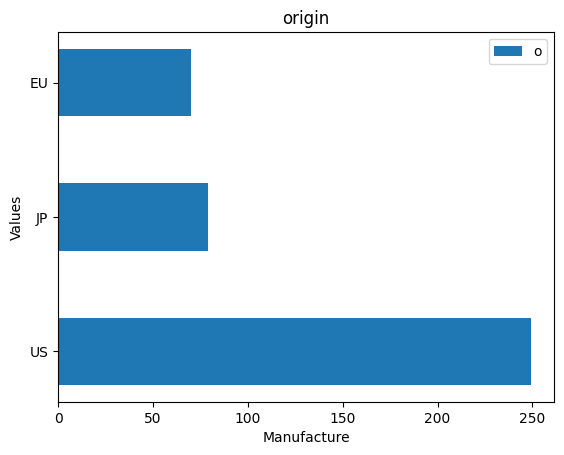

In [322]:
# .barh : bar + 'h'orizontal bar graph
plt.barh(originSR.index, originSR.values, height=0.5)  # height= : 바의 두께
plt.title('origin') 
plt.xlabel('Manufacture') 
plt.ylabel('Values') 
plt.legend('origin') 
plt.show() 

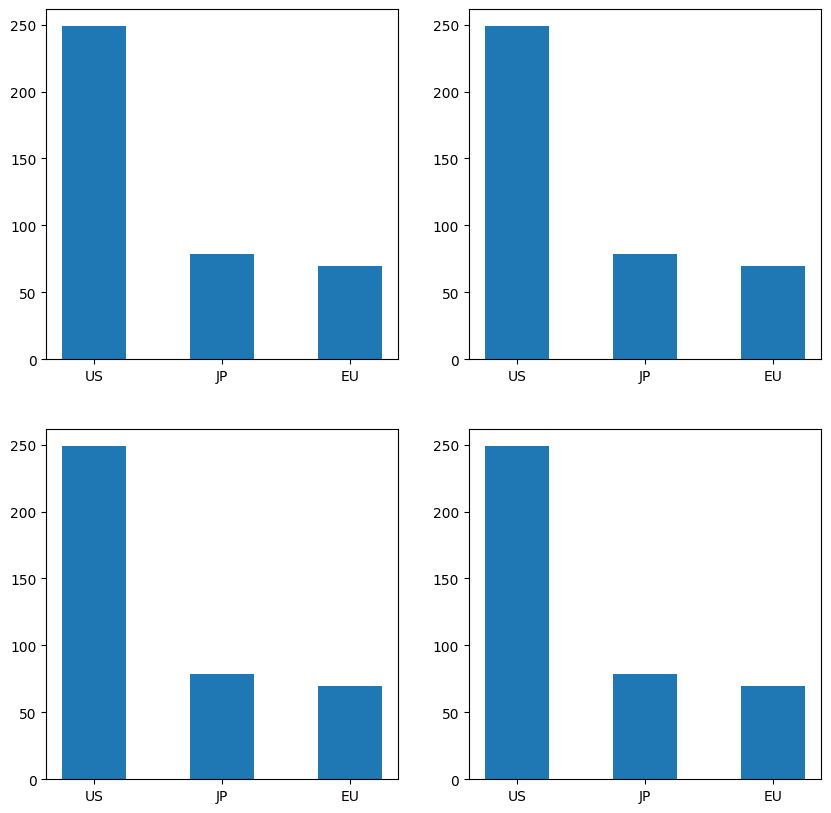

In [323]:
# ----- [.figure()  .subplot(row, col, num) ] -----
# .figure : set entire size
plt.figure(figsize=(10,10))

# .subplot( row, col, number) : below chart is no.number in (row, col)

plt.subplot(2,2,1)
plt.bar(originSR.index, originSR.values, width=0.5)

plt.subplot(2,2,2)
plt.bar(originSR.index, originSR.values, width=0.5)

plt.subplot(2,2,3)
plt.bar(originSR.index, originSR.values, width=0.5)

plt.subplot(2,2,4)
plt.bar(originSR.index, originSR.values, width=0.5)

#  .tight_layout : prevent 
plt.tight_layout  # 차트가 겹치지 않게 맞춰줌

plt.show()

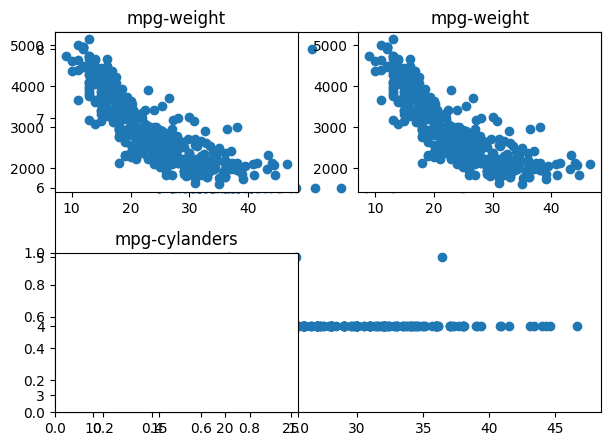

In [324]:
#  .subplots() (!= .subplot())
fig, ax = plt.subplots()

ax1 = fig.add_subplot(221)
ax1.scatter(mpgDF['mpg'], mpgDF['weight'])
ax1.set_title("mpg-weight")

ax2 = fig.add_subplot(222)
ax2.scatter(mpgDF['mpg'], mpgDF['weight'])
ax2.set_title("mpg-weight")

ax3 = fig.add_subplot(2,2,3)
ax.scatter(mpgDF['mpg'], mpgDF ['cylinders'])
ax3.set_title("mpg-cylanders")

plt.tight_layout()
plt. show()

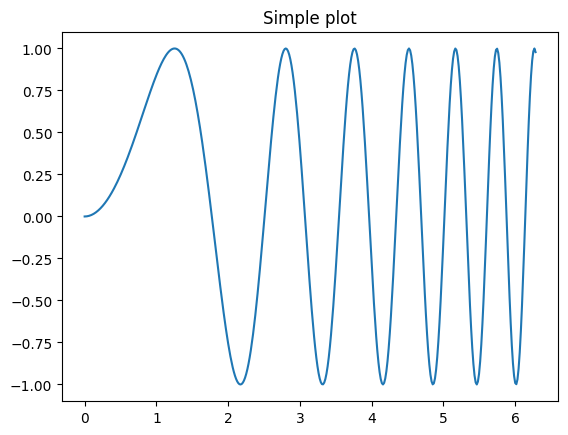

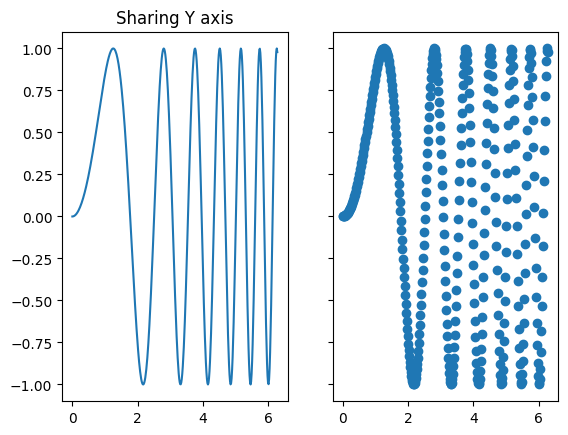

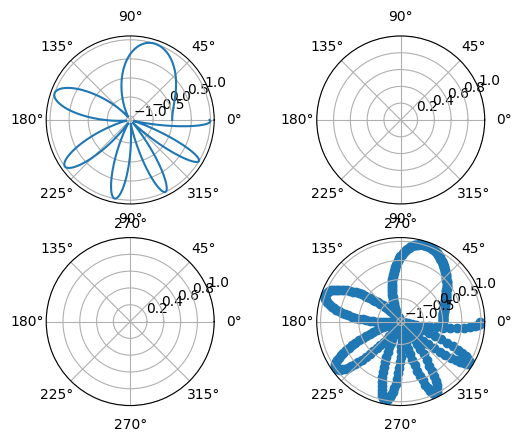

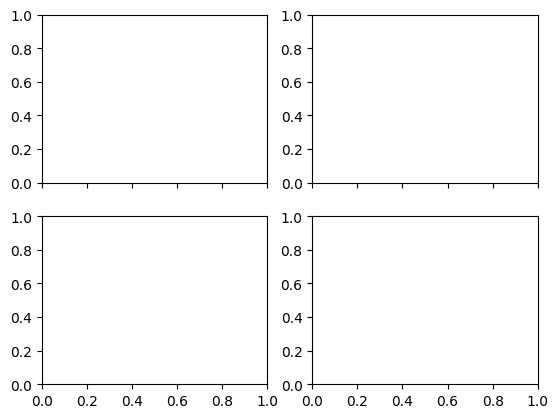

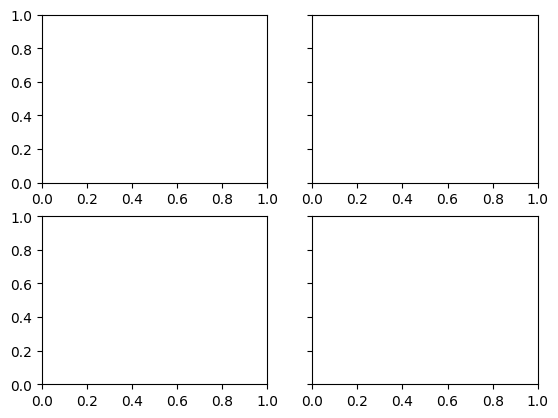

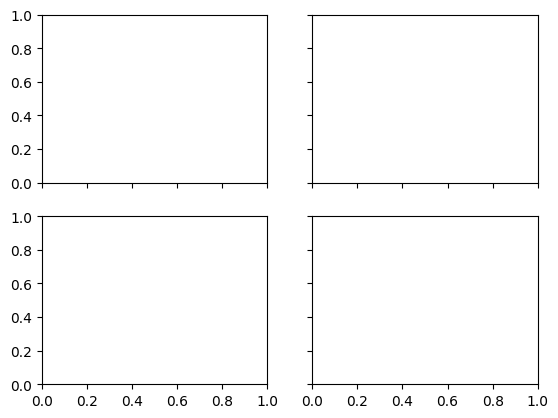

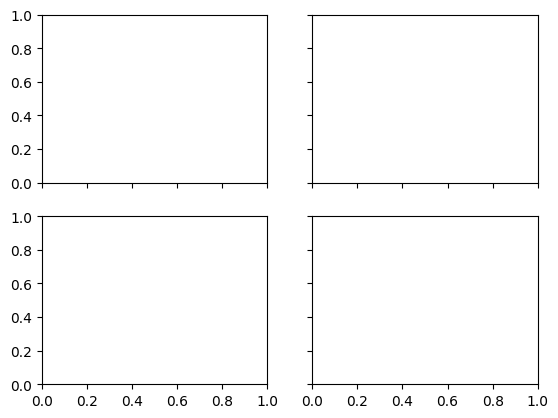

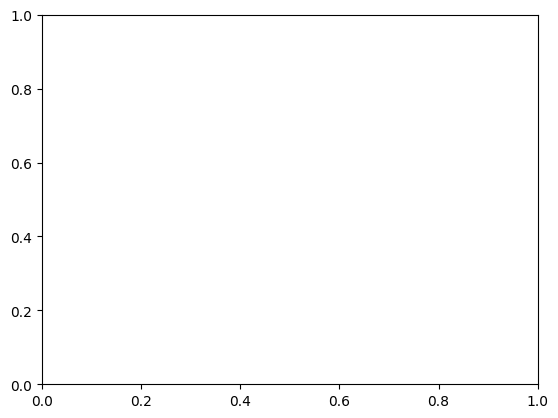

In [332]:
# Ex. from site

# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

# Create figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax = plt.subplots(num=10, clear=True)

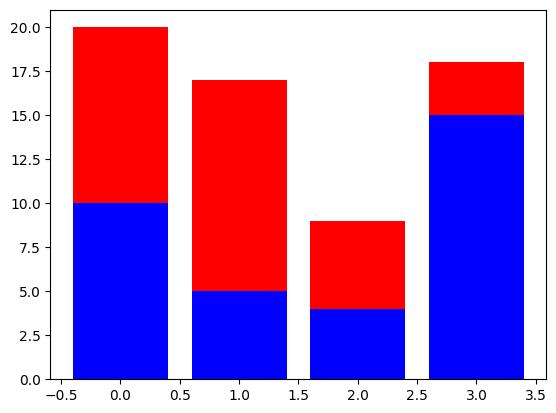

In [328]:
# Seperate (Stack) bar graph

# ( bottom=A )  => A: 아래에 올 값
# - 세로 분할 막대 차트 : 적층

A = [10, 5, 4, 15]
B = [10, 12, 5, 3]
X = range(4)

plt.bar(X, A, color = 'b' )
plt.bar(X, B, color = 'r', bottom = A)
plt. show ()

<hr>  [Decorate] : 필요할 때 찾아서 쓰기

Other Parameters:  
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html

<BarContainer object of 3 artists>

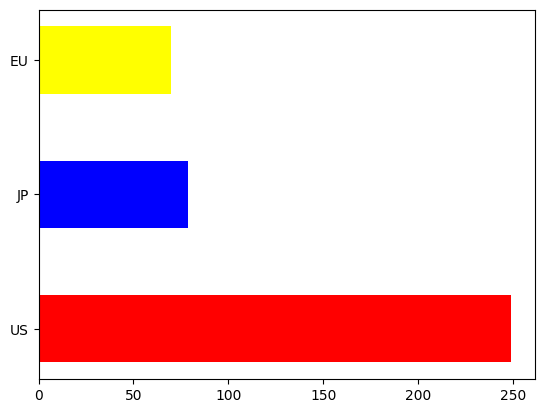

In [336]:
# [ decorate ] : color, label, size

colorList = ['red', 'blue', 'yellow']
plt.barh(
    originSR.index, originSR.values, height=0.5, color=colorList
    )

# plt.bar_label(1,2,3)      : 얘 왜 안 써지지
# labels = originSR.values  : 얘도
# size_mpg = mpgDF['mpg']  => size 는 scatter에 사용!

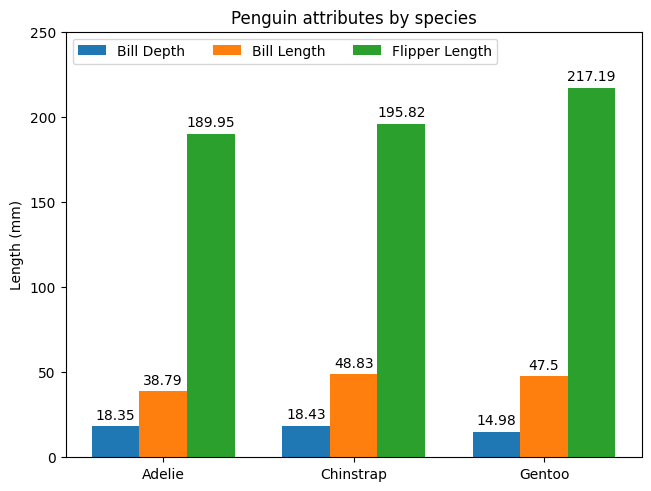

In [335]:
# for 로 돌리기 : 펭귄 예시

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

# -------------- for  .bar -------------------------
for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

Pie Chart:  
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie

<hr>

Seaborn :  
https://seaborn.pydata.org/examples/index.html

In [ ]:
# Fin. Pie is in next page